# 2.1

### 코드 2-1 케라스에서 MNIST 데이터셋 적재하기

In [2]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

훈련 데이터 크기 확인

In [3]:
train_images.shape

(60000, 28, 28)

In [4]:
len(train_labels)

60000

In [5]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

테스트 데이터 크기 확인

In [6]:
test_images.shape

(10000, 28, 28)

In [7]:
len(test_labels)

10000

In [8]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

### 코드 2-2 신경망 구조

In [9]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(512, activation = "relu"),
    layers.Dense(10, activation = "softmax")
])

### 코드 2-3 컴파일 단계

In [10]:
model.compile(optimizer = "rmsprop",
              loss = "sparse_categorical_crossentropy",
              metrics = ["accuracy"])

### 코드 2-4 이미지 데이터 준비하기

In [11]:
# (60000, 28, 28) -> (60000, 28 * 28)으로 크기 변경
train_images = train_images.reshape((60000, 28 * 28))
test_images = test_images.reshape((10000, 28 * 28))
# float32 type으로 변환한 후 0 ~ 1 사이의 값으로 스케일링
train_images = train_images.astype("float32") / 255
test_images = test_images.astype("float32") / 255

### 코드 2-5 모델 훈련하기

In [12]:
model.fit(train_images, train_labels, epochs = 5, batch_size = 128)

Epoch 1/5
469/469 [==============================] - 8s 13ms/step - loss: 0.4246 - accuracy: 0.8751
Epoch 2/5
469/469 [==============================] - 6s 13ms/step - loss: 0.1167 - accuracy: 0.9651
Epoch 3/5
469/469 [==============================] - 6s 13ms/step - loss: 0.0675 - accuracy: 0.9800
Epoch 4/5
469/469 [==============================] - 6s 13ms/step - loss: 0.0484 - accuracy: 0.9858
Epoch 5/5
469/469 [==============================] - 6s 13ms/step - loss: 0.0356 - accuracy: 0.9896


### 코드 2-6 모델을 사용하여 예측 만들기

In [13]:
test_digits = test_images[0:10]

In [14]:
predictions = model.predict(test_digits)

In [15]:
predictions[0]

array([2.9507559e-09, 1.7840653e-10, 3.0773958e-06, 1.3585178e-05,
       4.9112819e-13, 1.2260293e-09, 8.1481436e-15, 9.9998128e-01,
       5.3017327e-08, 1.9670329e-06], dtype=float32)

In [16]:
predictions[0].argmax()

7

In [17]:
predictions[0][7]

0.9999813

In [18]:
test_labels[0]

7

### 코드 2-7 새로운 데이터에서 모델 평가하기

In [19]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.0649 - accuracy: 0.9808


In [20]:
print(f"Test accuracy: {test_acc}")

Test accuracy: 0.9807999730110168


# 2.2

In [21]:
import numpy as np

#### 스칼라(rank-0 tensor): 하나의 숫자만 담고 있는 텐서, axis가 없다.

In [22]:
x = np.array(12)

In [23]:
x

array(12)

In [24]:
x.ndim

0

#### 벡터(rank-1 tensor): 숫자의 배열, 단 하나의 axis를 가진다.

In [25]:
x = np.array([12, 3, 6, 14, 7]) # 5차원 텐서, 축을 따라 있는 원소의 개수가 차원의 개수이다.

In [26]:
x

array([12,  3,  6, 14,  7])

In [27]:
x.ndim

1

#### 행렬(rank-2 tensor): 벡터의 배열, 두 개의 axis를 가진다.

In [28]:
x = np.array([[5, 78, 2, 34, 0],
              [6, 79, 3, 35, 1],
              [7, 80, 4, 36, 2]])

In [29]:
x.ndim

2

#### rank-3 and higher rank tensors

In [30]:
x = np.array([[[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]],
              [[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]],
              [[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]]])

In [31]:
x.ndim

3

#### tensor의 구성 요소: 축의 개수(rank), 크기(shape), 데이터 타입(dtype)

In [32]:
from tensorflow.keras.datasets import mnist

In [33]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [34]:
train_images.ndim # 축의 개수(rank)

3

In [35]:
train_images.shape # 크기(shape)

(60000, 28, 28)

In [36]:
train_images.dtype # 데이터 타입(dtype)

dtype('uint8')

### 코드 2-8 다섯 번째 이미지 출력하기

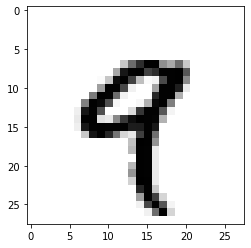

In [37]:
import matplotlib.pyplot as plt

digit = train_images[4]
plt.imshow(digit, cmap = plt.cm.binary)
plt.show()

In [38]:
train_labels[4]

9

# 2.3 텐서 연산

### 원소별 연산

In [1]:
def naive_relu(x):
    assert len(x.shape) == 2 # 입력은 rank-2 tensor
    x = x.copy() # 입력 텐서 자체를 바꾸지 않도록 복사
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] = max(x[i, j], 0) # relu(n): max(n, 0)
    return x

In [2]:
def naive_add(x, y):
    assert len(x.shape) == 2 # 입력 x, y는 rank-2 tensor
    assert x.shape == y.shape # 두 rank-2 tensor의 크기는 같아야 함
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] += y[i, j]
    return x

In [3]:
import numpy as np
import time

x = np.random.random((20, 100))
y = np.random.random((20, 100))

t0 = time.time()

for _ in range(1000):
    z = x + y
    z = np.maximum(z, 0.)

print("걸린 시간: {0:.2f}s".format(time.time() - t0))

걸린 시간: 0.01s


In [4]:
t0 = time.time()

for _ in range(1000):
    z = naive_add(x, y)
    z = naive_relu(z)

print("걸린 시간: {0:.2f}s".format(time.time() - t0))

걸린 시간: 5.15s


### 브로드캐스팅

In [5]:
import numpy as np

x = np.random.random((32, 10)) # x는 (32, 10)이 된다.
y = np.random.random((10, )) # y는 (10, )이 된다.

In [6]:
y = np.expand_dims(y, axis = 0) # y는 (1, 10)이 된다.

In [7]:
Y = np.concatenate([y] * 32, axis = 0) # axis-0을 따라 32회 반복

In [8]:
def naive_add_matrix_and_vector(x, y):
    assert len(x.shape) == 2 # x is a rank-2 numpy array
    assert len(y.shape) == 1 # y is a rank-1 numpy array
    assert (x.shape[1] == y.shape[0]) # y is added following the 0-axis
    x = x.copy()
    for i in range(x.shape[0]): # row
        for j in range(x.shape[1]): # column
            x[i, j] += y[j]
    return x

In [9]:
import numpy as np

x = np.random.random((64, 3, 32, 10))
y = np.random.random((32, 10))
z = np.maximum(x, y)

In [11]:
z.shape

(64, 3, 32, 10)

### 텐서 곱셈

In [12]:
def naive_vector_dot(x, y):
    assert len(x.shape) == 1 # x is a numpy vector
    assert len(y.shape) == 1 # y is a numpy vector
    assert x.shape[0] == y.shape[0]
    z = 0.
    for i in range(x.shape[0]):
        z += x[i] * y[i]
    return z

In [13]:
def naive_matrix_vector_dot(x, y):
    z = np.zeros(x.shape[0])
    for i in range(x.shape[0]):
        z[i] = naive_vector_dot(x[i, :], y)
    return z

In [16]:
def naive_matrix_dot(x, y):
    assert len(x.shape) == 2
    assert len(y.shape) == 2
    assert x.shape[1] == y.shape[0]
    
    z = np.zeros((x.shape[0], y.shape[1]))
    
    for i in range(x.shape[0]):
        for j in range(y.shape[1]):
            z[i][j] = naive_vector_dot(x[i, :], y[:, j])
    
    return z

### 텐서 크기 변환

In [17]:
import numpy as np

x = np.array([[0., 1.],
              [2., 3.],
              [4., 5.]])

In [18]:
x.shape

(3, 2)

In [19]:
x = x.reshape((6, 1))

In [20]:
x

array([[0.],
       [1.],
       [2.],
       [3.],
       [4.],
       [5.]])

In [21]:
x = x.reshape((2, 3))

In [22]:
x

array([[0., 1., 2.],
       [3., 4., 5.]])

In [24]:
x = np.zeros((300, 20))

In [26]:
x.shape

(300, 20)

In [27]:
x = np.transpose(x)

In [28]:
x.shape

(20, 300)

### 그레이디언트 테이프

In [1]:
import tensorflow as tf

In [3]:
x = tf.Variable(0.) # create a scalar variable with initial value 0
with tf.GradientTape() as tape: # start GradientTape block
    y = 2 * x + 3 # apply tensor operation to the variable
grad_of_y_wrt_x = tape.gradient(y, x)

In [4]:
grad_of_y_wrt_x

<tf.Tensor: shape=(), dtype=float32, numpy=2.0>

In [5]:
x = tf.Variable(tf.zeros((2, 2)))
with tf.GradientTape() as tape:
    y = 2 * x + 3
grad_of_y_wrt_x = tape.gradient(y, x)

In [6]:
grad_of_y_wrt_x

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[2., 2.],
       [2., 2.]], dtype=float32)>

In [7]:
W = tf.Variable(tf.random.uniform((2, 2)))
b = tf.Variable(tf.zeros((2, )))
x = tf.random.uniform((2, 2))

with tf.GradientTape() as tape:
    y = tf.matmul(x, W) + b
    
grad_of_y_wrt_W_and_b = tape.gradient(y, [W, b])

In [8]:
grad_of_y_wrt_W_and_b

[<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
 array([[1.1581889, 1.1581889],
        [1.5169017, 1.5169017]], dtype=float32)>,
 <tf.Tensor: shape=(2,), dtype=float32, numpy=array([2., 2.], dtype=float32)>]

# 2.5 첫 번째 예제를 naive하게 다시 구현하기

### naive dense class

In [9]:
import tensorflow as tf

class NaiveDense:
    def __init__(self, input_size, output_size, activation):
        self.activation = activation
        
        w_shape = (input_size, output_size) # shape of matrix W
        w_initial_value = tf.random.uniform(w_shape, minval = 0, maxval = 1e-1) # create matrix
        self.W = tf.Variable(w_initial_value)
        
        b_shape = (output_size, ) # shape of vector b
        b_initial_value = tf.zeros(b_shape)
        self.b = tf.Variable(b_initial_value)
    
    def __call__(self, inputs):
        return self.activation(tf.matmul(inputs, self.W) + self.b)
    
    @property
    def weights(self): # method for extracting weights of the layer
        return [self.W, self.b]

### naive sequential class

In [10]:
class NaiveSequential:
    def __init__(self, layers):
        self.layers = layers
        
    def __call__(self, inputs):
        x = inputs
        for layer in self.layers:
            x = layer(x)
        return x
    
    @property
    def weights(self):
        weights = []
        for layer in self.layers:
            weights += layer.weights
        return weights


### generate keras-like model

In [11]:
model = NaiveSequential([
    NaiveDense(input_size = 28 * 28, output_size = 512, activation = tf.nn.relu),
    NaiveDense(input_size = 512, output_size = 10, activation = tf.nn.softmax)
])

assert len(model.weights) == 4

### batch generator

In [12]:
import math

class BatchGenerator:
    def __init__(self, images, labels, batch_size = 128):
        assert len(images) == len(labels)
        self.index = 0
        self.images = images
        self.labels = labels
        self.batch_size = batch_size
        self.num_batches = math.ceil(len(images) / batch_size)
        
    def next(self):
        images = self.images[self.index : self.index + self.batch_size]
        labels = self.labels[self.index : self.index + self.batch_size]
        self.index += self.batch_size
        return images, labels

### execute training step

In [13]:
def one_training_step(model, images_batch, labels_batch):
    with tf.GradientTape() as tape:
        predictions = model(images_batch) # forward pass: calculate predictions of the model
        per_sample_losses = tf.keras.losses.sparse_categorical_crossentropy(labels_batch, predictions) # forward pass: calculate each loss of the predictions
        average_loss = tf.reduce_mean(per_sample_losses) # forward pass: calculate the average of losses
    
    gradients = tape.gradient(average_loss, model.weights) # calculate the gradient of loss to weights
    update_weights(gradients, model.weights) # update weights using the calculated gradient
    return average_loss

In [14]:
learning_rate = 1e-3

def update_weights(gradients, weights):
    for g, w in zip(gradients, weights):
        w.assign_sub(g * learning_rate) # equivalent with w -= learning_rate * gradient

### instead of implementing manually, just use keras library

In [15]:
from tensorflow.keras import optimizers

optimizer = optimizers.SGD(learning_rate = 1e-3)

def update_weights(gradients, weights):
    optimizer.apply_gradients(zip(gradients, weights))

In [18]:
def fit(model, images, labels, epochs, batch_size = 128):
    for epoch_counter in range(epochs):
        print(f"epoch {epoch_counter}")
        batch_generator = BatchGenerator(images, labels)
        for batch_counter in range(batch_generator.num_batches):
            images_batch, labels_batch = batch_generator.next()
            loss = one_training_step(model, images_batch, labels_batch)
            if batch_counter % 100 == 0:
                print(f"{batch_counter}th batch loss: {loss:.2f}")

In [19]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

fit(model, train_images, train_labels, epochs = 10, batch_size = 128)

epoch 0
0th batch loss: 3.16
100th batch loss: 2.22
200th batch loss: 2.21
300th batch loss: 2.07
400th batch loss: 2.21
epoch 1
0th batch loss: 1.90
100th batch loss: 1.87
200th batch loss: 1.84
300th batch loss: 1.70
400th batch loss: 1.83
epoch 2
0th batch loss: 1.58
100th batch loss: 1.58
200th batch loss: 1.51
300th batch loss: 1.42
400th batch loss: 1.52
epoch 3
0th batch loss: 1.33
100th batch loss: 1.34
200th batch loss: 1.25
300th batch loss: 1.20
400th batch loss: 1.28
epoch 4
0th batch loss: 1.13
100th batch loss: 1.16
200th batch loss: 1.05
300th batch loss: 1.04
400th batch loss: 1.11
epoch 5
0th batch loss: 0.99
100th batch loss: 1.02
200th batch loss: 0.91
300th batch loss: 0.92
400th batch loss: 0.99
epoch 6
0th batch loss: 0.88
100th batch loss: 0.91
200th batch loss: 0.80
300th batch loss: 0.83
400th batch loss: 0.90
epoch 7
0th batch loss: 0.79
100th batch loss: 0.83
200th batch loss: 0.72
300th batch loss: 0.76
400th batch loss: 0.84
epoch 8
0th batch loss: 0.73
100

In [21]:
import numpy as np

predictions = model(test_images)
predictions = predictions.numpy()
predicted_labels = np.argmax(predictions, axis = 1)
matches = predicted_labels == test_labels
print(f"accuracy: {matches.mean():.2f}")

accuracy: 0.81
